In [1]:
import pandas as pd
import numpy as np
import re
import time
import json
import bs4 as bs4
import tqdm #tqdm é usando para mostrar barra de carregamento
import glob

pd.set_option("max.columns", 131)

#https://strtime.org/
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("raw_data_with_labels.csv", index_col=0)
df = df[df['y'].notnull()]
df.shape

(498, 16)

In [3]:
df.head()

,watch-title,y,watch-view-count,watch-time-text,content_watch-info-tag-list,watch7-headline,watch7-user-header,watch8-sentiment-actions,og:image,og:image:width,og:image:height,og:description,og:video:width,og:video:height,og:video:tag,channel_link_0
0,How to Become A Machine Learning Engineer | Ho...,0.0,28.028 visualizações,Publicado em 3 de set. de 2018,Educação,#MachineLearningAlgorithms #Datasciencecourse ...,Simplilearn\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarre...,28.028 visualizações\n\n\n\n\n\n\n\n601\n\nGos...,https://i.ytimg.com/vi/-5hEYRt8JE0/maxresdefau...,1280.0,720.0,"This video on ""How to become a Machine Learnin...",1280.0,720.0,simplilearn,/channel/UCsvqVGtbbyHaMoevxPAq9Fg
1,BLOOPERS - Behind The Scenes. | DATA SCIENCE x...,0.0,1.131 visualizações,Publicado em 16 de nov. de 2018,Pessoas e blogs,#FAIL #insidezalando\n\n\n\n BLOOPERS - Beh...,Inside Zalando\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarr...,1.131 visualizações\n\n\n\n\n\n\n\n20\n\nGosto...,https://i.ytimg.com/vi/-7GiiT0yEyk/maxresdefau...,1280.0,720.0,#FAIL :) Have fun - and join our teams: https:...,1280.0,720.0,employer branding,/channel/UCTPin8TK-KRSI9zo9FoxG0g
2,Michael I. Jordan: Machine Learning: Dynamical...,1.0,1.816 visualizações,Publicado em 2 de mai. de 2019,Licença de atribuição Creative Commons (reutil...,#purdue #michaelijordan #engineering\n\n\n\n ...,Purdue Engineering\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,1.816 visualizações\n\n\n\n\n\n\n\n42\n\nGosto...,https://i.ytimg.com/vi/-8yYFdV5SOc/maxresdefau...,1280.0,720.0,2019 Purdue Engineering Distinguished Lecture ...,1280.0,720.0,electrical engineer,/channel/UC8FZ6dzFVkCACLH9YoMNFog
3,Best Deep Learning Tools - Welcome.AI,0.0,1.171 visualizações,Publicado em 13 de ago. de 2019,Ciência e tecnologia,Best Deep Learning Tools - Welcome.AI,Welcome.AI\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregan...,1.171 visualizações\n\n\n\n\n\n\n\n14\n\nGosto...,https://i.ytimg.com/vi/-9LLrwW1Vdo/maxresdefau...,1280.0,720.0,A collection of the 5 best deep learning tools...,1280.0,720.0,Watson,/channel/UC_215Y7rOAsqnFkO_hnpdIg
4,Kaggle Live-Coding: RNNs for Sarcasm Detection...,1.0,1.228 visualizações,Transmitido ao vivo em 30 de nov. de 2018,Ciência e tecnologia,Kaggle Live-Coding: RNNs for Sarcasm Detection...,Kaggle\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando.....,1.228 visualizações\n\n\n\n\n\n\n\n28\n\nGosto...,https://i.ytimg.com/vi/-9U84J178OQ/maxresdefau...,1280.0,720.0,Join Kaggle data scientist Rachael live as she...,1280.0,720.0,CS,/channel/UCSNeZleDn9c74yQc-EKnVTA


In [4]:
df.tail()


,watch-title,y,watch-view-count,watch-time-text,content_watch-info-tag-list,watch7-headline,watch7-user-header,watch8-sentiment-actions,og:image,og:image:width,og:image:height,og:description,og:video:width,og:video:height,og:video:tag,channel_link_0
496,Machine Learning With Python | Machine Learnin...,0.0,170.932 visualizações,Publicado em 1 de mar. de 2018,Educação,Machine Learning With Python | Machine Learnin...,Simplilearn\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarre...,170.932 visualizações\n\n\n\n\n\n\n\n2.393\n\n...,https://i.ytimg.com/vi/Q59X518JZHE/maxresdefau...,1280.0,720.0,This Machine Learning with Python tutorial giv...,1280.0,720.0,simplilearn machine learning,/channel/UCsvqVGtbbyHaMoevxPAq9Fg
497,MACHINE LEARNING and AUGMENTED REALITY,0.0,69.644 visualizações,Publicado em 31 de mai. de 2018,Ciência e tecnologia,MACHINE LEARNING and AUGMENTED REALITY,MatthewHallberg\n\n\n\n\n\n\n\n\n\n\n\n\n\nCar...,69.644 visualizações\n\n\n\n\n\n\n\n1.569\n\nG...,https://i.ytimg.com/vi/Q6ERFwQNkzo/maxresdefau...,1280.0,720.0,This tutorial is going to go through getting T...,1280.0,720.0,image classification tensorflow tutorial,/channel/UClm2DY6pj3ygKoKhEVr7KFw
498,Kaggle 대회 시작하기 #1,0.0,470 visualizações,Publicado em 10 de nov. de 2019,Pessoas e blogs,Palos Verdes\n\n\n\n Kaggle 대회 시작하기 #1,LA오빠\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando...\...,470 visualizações\n\n\n\n\n\n\n\n39\n\nGostou ...,https://i.ytimg.com/vi/Q71MI-MkGhg/maxresdefau...,1280.0,720.0,LA오남매아빠 #LA오빠 - #즐거운DataScience 오늘은 현재 진행 중인 A...,1280.0,720.0,Ashrae Energy Prediction,/channel/UCjhlZKSIRVvQxlUprmv0bdg
499,The Netacea Approach | Smarter Bot Management ...,1.0,99.855 visualizações,Publicado em 25 de abr. de 2019,Ciência e tecnologia,The Netacea Approach | Smarter Bot Management ...,Netacea\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando....,99.855 visualizações\n\n\n\n\n\n\n\n14\n\nGost...,https://i.ytimg.com/vi/QDh1vq9tVsY/hqdefault.jpg,480.0,360.0,The majority of internet traffic is now made u...,1280.0,720.0,Cyber threats,/channel/UCMLXUedkowSUnn5rSXKUzCQ
500,Stanford CS224N: NLP with Deep Learning | Wint...,0.0,17.363 visualizações,Publicado em 21 de mar. de 2019,Educação,Stanford CS224N: NLP with Deep Learning | Wint...,stanfordonline\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarr...,17.363 visualizações\n\n\n\n\n\n\n\n191\n\nGos...,https://i.ytimg.com/vi/QEw0qEa0E50/maxresdefau...,1280.0,720.0,Professor Christopher Manning & PhD Candidate ...,1280.0,720.0,NaN,/channel/UCBa5G_ESCn8Yd4vw5U-gIcg


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
df_limpo = pd.DataFrame(index=df.index)
df_limpo.head()

""
0
1
2
3
4


# 1. Limpeza da data

In [16]:
clean_date = df['watch-time-text'].str.extract(r"(\d+) de ([a-z]+)\. de (\d+)") #criando df com as 3 colunas
clean_date[0] = clean_date[0].map(lambda x: "0"+x[0] if len(x) == 1 else x) #Adicionando 0 a frente dos numeros < 10

mapa_meses = {"jan": "Jan",
              "fev": "Feb",
              "mar": "Mar", 
              "abr": "Apr", 
              "mai": "May", 
              "jun": "Jun",
              "jul": "Jul",
              "ago": "Aug", 
              "set": "Sep", 
              "out": "Oct", 
              "nov": "Nov",
              "dez": "Dec"}

clean_date[1] = clean_date[1].map(mapa_meses)

clean_date = clean_date.apply(lambda x: " ".join(x), axis=1) #Aplicando a junção das colunas a cada linha

df_limpo['date'] = pd.to_datetime(clean_date, format="%d %b %Y") #Transforma a string como objeto data

In [20]:
df_limpo.head()

,date
0,2018-09-03
1,2018-11-16
2,2019-05-02
3,2019-08-13
4,2018-11-30


# 2. Limpeza do Views

In [25]:
views = df['watch-view-count'].str.extract(r"(\d+\.?\d*)", expand=False).str.replace(".", "").fillna(0).astype(int)
df_limpo['views'] = views

#Extract=False retorna uma série e não um df como padrão.

In [26]:
df_limpo.head()

,date,views
0,2018-09-03,28028
1,2018-11-16,1131
2,2019-05-02,1816
3,2019-08-13,1171
4,2018-11-30,1228


# 3. Features

In [27]:
features = pd.DataFrame(index=df_limpo.index) #mesmo indice do df_limpo
y = df['y'].copy()

In [31]:
features['tempo_desde_pub'] = (pd.to_datetime("2020-04-19") - df_limpo['date']) / np.timedelta64(1, 'D') #diferença de um dia
features['views'] = df_limpo['views']
features['views_por_dia'] = features['views'] / features['tempo_desde_pub']
features = features.drop(['tempo_desde_pub'], axis=1)

In [33]:
features.head()

,views,views_por_dia
0,28028,47.185185
1,1131,2.175000
2,1816,5.144476
3,1171,4.684000
4,1228,2.426877


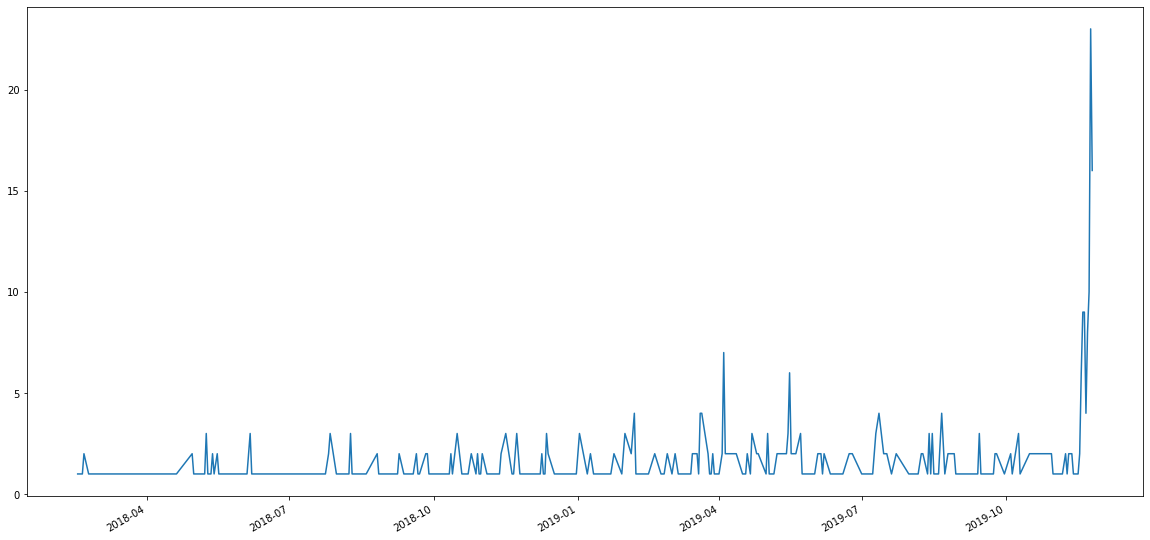

In [34]:
df_limpo['date'].value_counts().plot(figsize=(20,10))

In [40]:
#dividindo os dados de treino e validação

Xtrain, Xval = features[df_limpo['date'] < "2019-04-01"], features[df_limpo['date']>= '2019-04-01']
ytrain, yval = y[df_limpo['date'] < "2019-04-01"], y[df_limpo['date']>= '2019-04-01']
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((228, 2), (270, 2), (228,), (270,))

In [45]:
mdl = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight="balanced")
mdl.fit(Xtrain, ytrain)

#max_depth: Produndidade 2 ou seja, dois níveis de nós
#class_weight: Para tratar de forma igual as duas classes

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
p = mdl.predict_proba(Xval)[:,1]
#Array do numpy com a probabilidade de ser 1

In [49]:
#Metricas
from sklearn.metrics import roc_auc_score, average_precision_score

In [51]:
#Retorna a precisão de acerto do modelo, ou seja de todos os exemplos que o modelo definiu como positivo, quantos ele acertou.
average_precision_score(yval,p)

0.1488057030191191

In [52]:
#De todos os exemplos que são positivos quantos o modelo definiu como positivos
roc_auc_score(yval, p)

0.5702127659574467

In [53]:
from sklearn.tree import plot_tree

[Text(279.0, 453.0, 'views_por_dia <= 24.6\ngini = 0.5\nsamples = 228\nvalue = [114.0, 114.0]'),
 Text(139.5, 271.8, 'views_por_dia <= 0.455\ngini = 0.479\nsamples = 131\nvalue = [61.071, 92.625]'),
 Text(69.75, 90.59999999999997, 'gini = 0.0\nsamples = 12\nvalue = [6.98, 0.0]'),
 Text(209.25, 90.59999999999997, 'gini = 0.466\nsamples = 119\nvalue = [54.092, 92.625]'),
 Text(418.5, 271.8, 'views <= 26712.0\ngini = 0.41\nsamples = 97\nvalue = [52.929, 21.375]'),
 Text(348.75, 90.59999999999997, 'gini = 0.0\nsamples = 22\nvalue = [12.796, 0.0]'),
 Text(488.25, 90.59999999999997, 'gini = 0.453\nsamples = 75\nvalue = [40.133, 21.375]')]

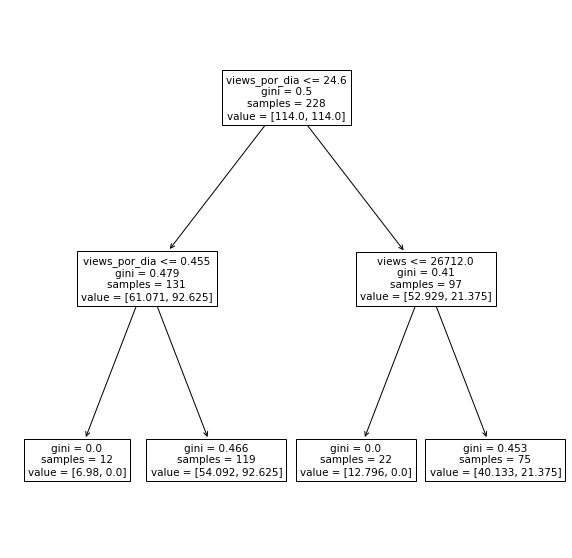

In [56]:
fig, ax = pylab.subplots(1,1, figsize=(10,10))
plot_tree(mdl, ax=ax, feature_names=Xtrain.columns)